## IMPORTING LIBRARIES AND DATASET

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
data = np.load("mnist_train_images.npy")
data = data/255
data = torch.Tensor(data)

## VAE ARCHITECTURE

In [0]:
class VAE(torch.nn.Module):

  def __init__(self):
    super(VAE, self).__init__()

    self.fc1 = torch.nn.Linear(784,400)
    self.relu1 = torch.nn.ReLU()
    self.mu = torch.nn.Linear(400,20)
    self.logvar = torch.nn.Linear(400,20)
    self.fc2 = torch.nn.Linear(20,400)
    self.relu2 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(400,784)
    self.sig = torch.nn.Sigmoid()

  def encode(self, x):
    
    out = self.fc1(x)
    out = self.relu1(out)
    out_mu = self.mu(out)
    out_logvar = self.logvar(out)

    return out_mu, out_logvar

  def sample(self,z_mu,z_logvar):
    
    std = torch.exp(z_logvar/2)
    eps = torch.randn_like(std).to(device)
    z = z_mu + std*eps

    return z

  def decode(self,z):

    out = self.fc2(z)
    out = self.relu2(out)
    out = self.fc3(out)
    out = self.sig(out)

    return out

  def loss(self, recon_x, x, mu, logvar):

    
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    diff = recon_x - x
    recon_loss = torch.sum(torch.mul(diff, diff))
      
    loss = (kl_loss + recon_loss)

    return loss

  def train(self, data, epochs=1, batch_size=1):

    for epoch in range(epochs):
      total_loss = torch.Tensor([0])
      total_loss.to(device)  
      
      for i in range(0,len(data),batch_size):
        inp = data[i:i+batch_size].to(device)

        z_mu, z_logvar = self.encode(inp)
        z = self.sample(z_mu, z_logvar)
        out = self.decode(z)

        optim.zero_grad()
        loss = self.loss(out, inp, z_mu, z_logvar)
        total_loss += loss
        loss.backward()
        optim.step()

      if (epoch+1)%10 == 0 or epoch == 0: 
        print("Epoch: ",epoch+1,"    loss: ",(total_loss.item())/data.shape[0])

## TRAINING

In [6]:
vae = VAE().to(device)
optim = torch.optim.Adam(vae.parameters(), lr=0.001)
vae.train(data, epochs=1000, batch_size=1000)

Epoch:  1     loss:  70.38558333333333
Epoch:  10     loss:  34.184979166666665
Epoch:  20     loss:  31.695339583333332
Epoch:  30     loss:  30.775341666666666
Epoch:  40     loss:  30.235777083333332
Epoch:  50     loss:  29.864070833333333
Epoch:  60     loss:  29.613985416666665
Epoch:  70     loss:  29.38452708333333
Epoch:  80     loss:  29.194997916666665
Epoch:  90     loss:  29.013939583333332
Epoch:  100     loss:  28.86676875
Epoch:  110     loss:  28.789564583333334
Epoch:  120     loss:  28.657683333333335
Epoch:  130     loss:  28.560339583333334
Epoch:  140     loss:  28.49235
Epoch:  150     loss:  28.427679166666667
Epoch:  160     loss:  28.420597916666665
Epoch:  170     loss:  28.32843125
Epoch:  180     loss:  28.26226875
Epoch:  190     loss:  28.212752083333335
Epoch:  200     loss:  28.181320833333334
Epoch:  210     loss:  28.140814583333334
Epoch:  220     loss:  28.121060416666666
Epoch:  230     loss:  28.070479166666665
Epoch:  240     loss:  28.04125
Epoc

## TESTING ON TRAIN IMAGES

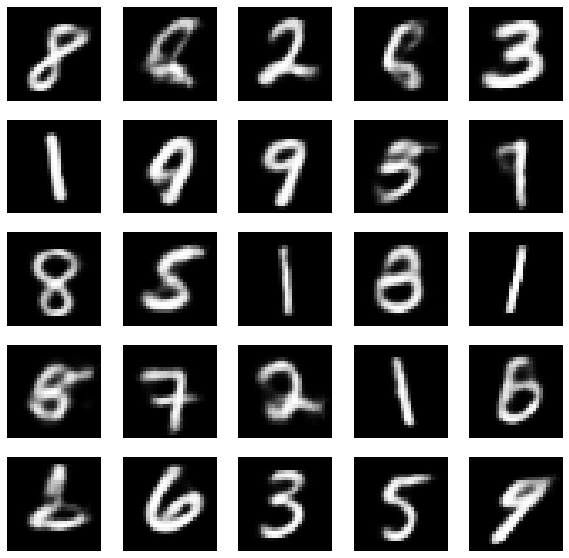

In [7]:
import random
fig, ax = plt.subplots(figsize=(10,10), nrows=5, ncols=5)

plt.axis('off')
i=0
for row in ax:
  for col in row:
    dummy = data[random.randint(0,10000)].to(device)
    mu, lvar = vae.encode(dummy)
    z = vae.sample(mu, lvar)
    image = vae.decode(z)
    image = image.view(28,28)
    col.imshow(image.detach().cpu().numpy(), cmap='gray')
    col.set_axis_off()
    i+=1
    
plt.show()

## GENERATING FROM RANDOM NOISE

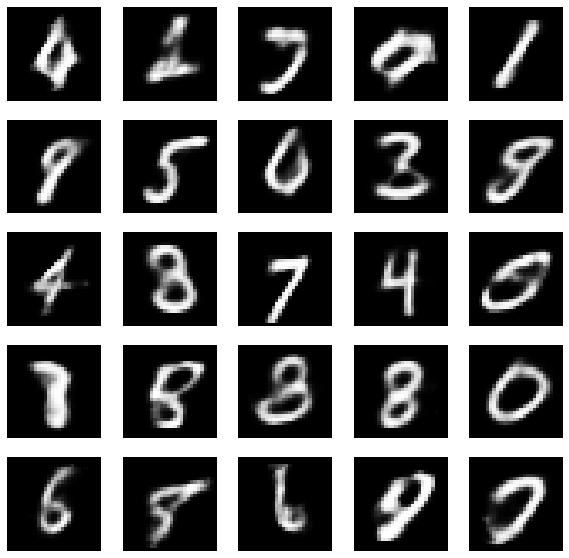

In [8]:
fig, ax = plt.subplots(figsize=(10,10), nrows=5, ncols=5)

plt.axis('off')
i=0
for row in ax:
  for col in row:
    dummy = torch.randn(1,20).to(device)
    image = vae.decode(dummy)
    image = image.view(28,28)
    col.imshow(image.detach().cpu().numpy(), cmap='gray')
    col.set_axis_off()
    i+=1
    
plt.show()